In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("diamonds.csv")
df.drop('Unnamed: 0', axis=1,inplace=True)

In [13]:
print(df.head())
print(df.describe())
print(df.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53939.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731153   
std        0.474011      1.432621      2.234491   3989.439738      1.121771   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000  

In [14]:
print("Nulls: \n", df.isnull().sum())
print("Duplicates: ", df.duplicated().sum())
updated_df = df.drop_duplicates()
updated_df = updated_df.dropna()

Nulls: 
 carat      0
cut        0
color      0
clarity    1
depth      0
table      0
price      0
x          1
y          0
z          0
dtype: int64
Duplicates:  146


# Encoding

In [15]:
cut_types = updated_df['cut'].unique()
print(cut_types)
updated_df = updated_df[~((updated_df['cut']=="ideal") | (updated_df['cut']=="very good"))]
cut_types = updated_df['cut'].unique()
print(cut_types)
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
#updated_df['cut'] = updated_df['cut'].map(cut_map)
updated_df.loc[:, 'cut'] = updated_df['cut'].map(cut_map)
print(updated_df['cut'].sort_values().unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'ideal' 'very good']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
[1 2 3 4 5]


In [16]:
color_types = updated_df['color'].unique()
print(color_types)
updated_df = updated_df[~(updated_df['color']=="e")]
color_types = updated_df['color'].unique()
print(color_types)
color_map = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
updated_df.loc[:, 'color'] = updated_df['color'].map(color_map)
print(updated_df['color'].sort_values().unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D' 'e']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
[1 2 3 4 5 6 7]


In [17]:
updated_df = updated_df.dropna()
clarity_types = updated_df['clarity'].unique()
print(clarity_types)
updated_df = updated_df[~(updated_df['clarity']=="8")]
clarity_map = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}
updated_df.loc[:, 'clarity'] = updated_df['clarity'].map(clarity_map)
print(updated_df['clarity'].sort_values().unique())


['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' '8']
[1 2 3 4 5 6 7 8]


# Visualization before Scaling

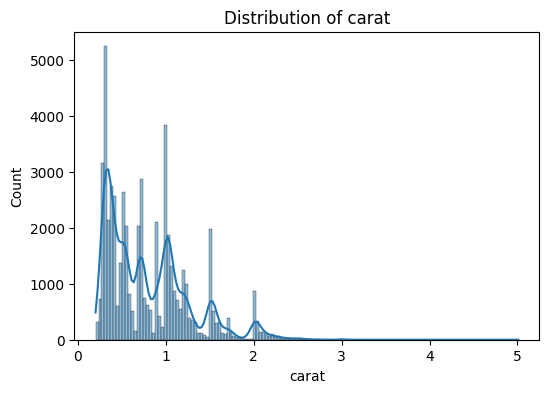

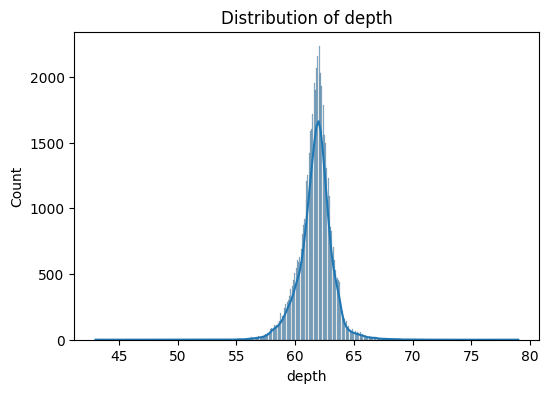

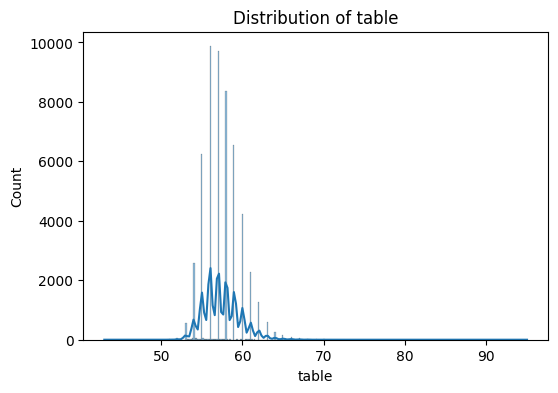

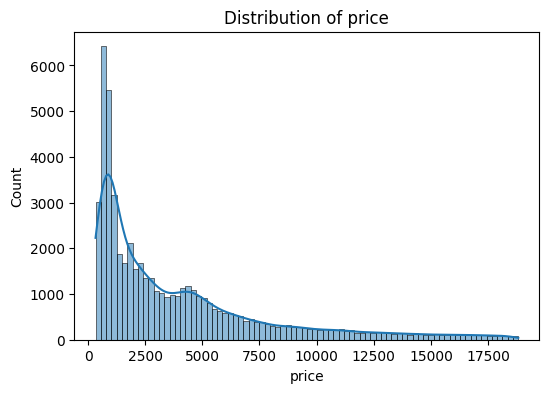

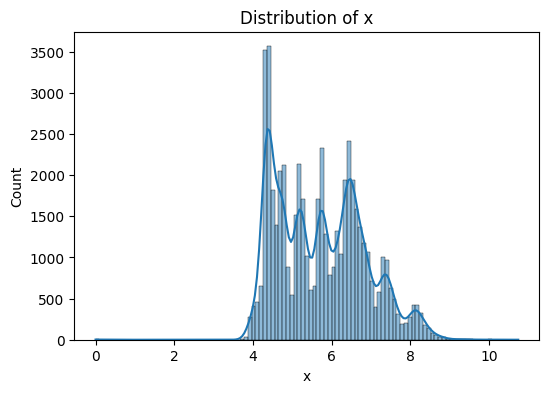

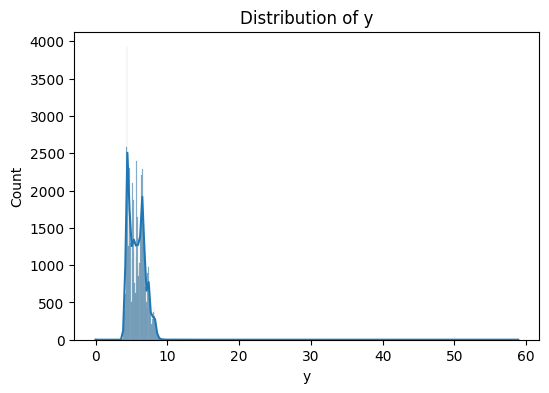

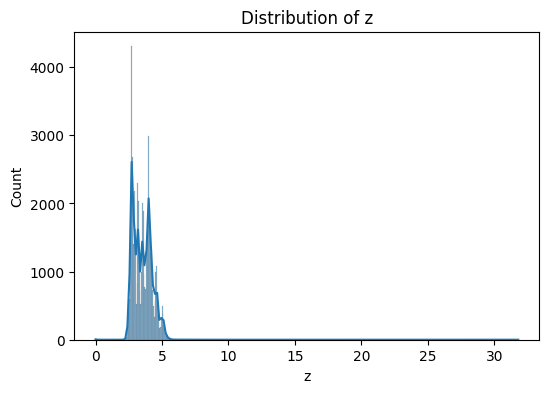

In [18]:
numeric_colms = updated_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_colms:
    plt.figure(figsize=(6, 4))
    sns.histplot(updated_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

carat,price,y,z are right skewed  

x,depth are normaly distributed

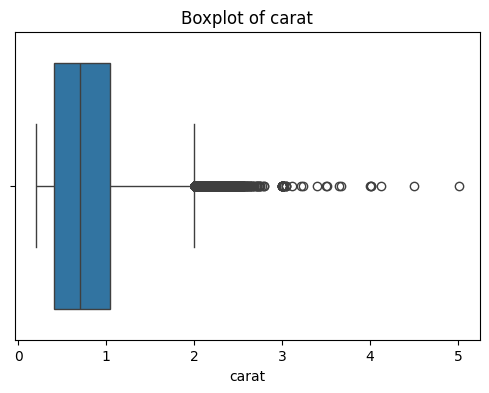

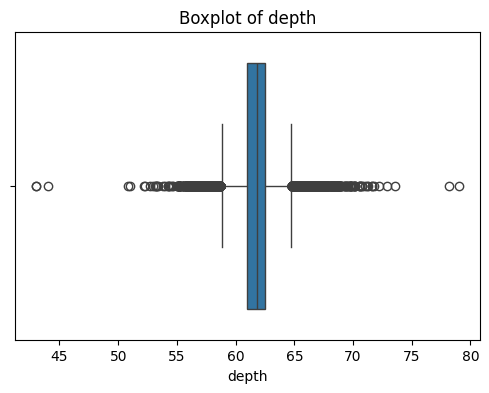

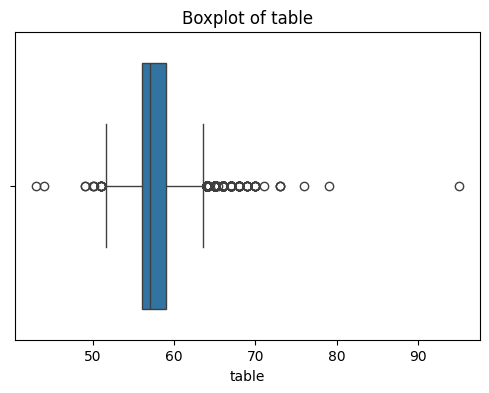

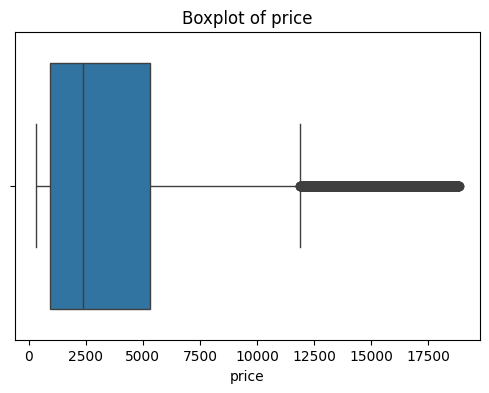

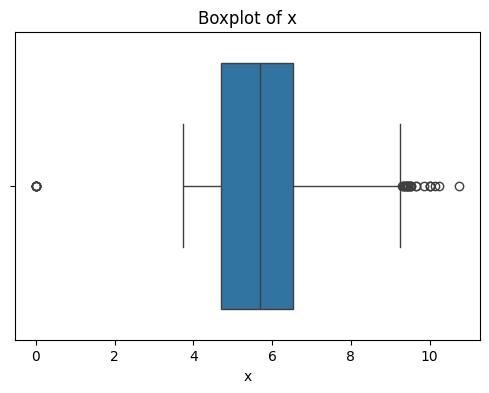

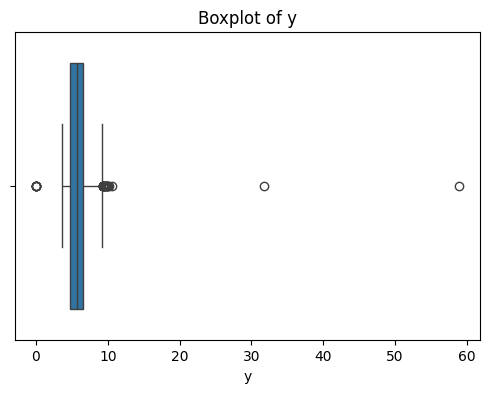

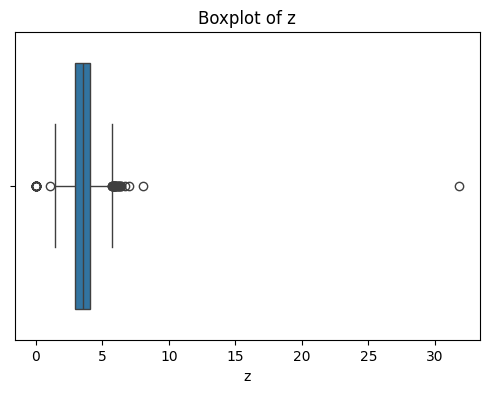

In [19]:
for col in numeric_colms:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=updated_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

alot of outliers 

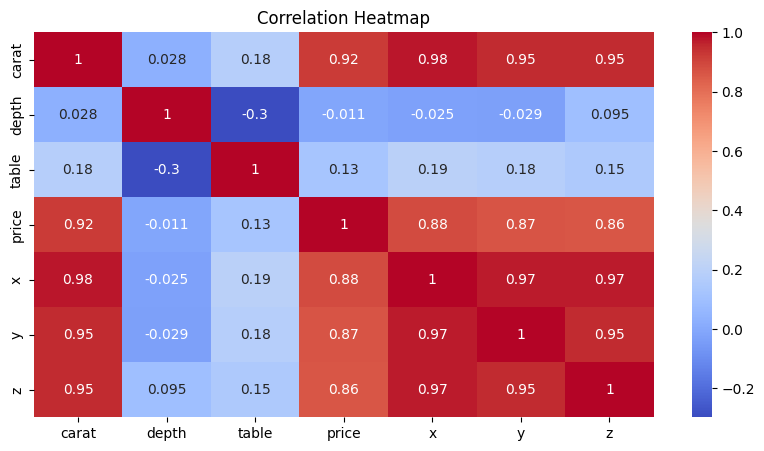

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(updated_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


x,y,z,carat and price are highly correlated

carat has the most influence on price

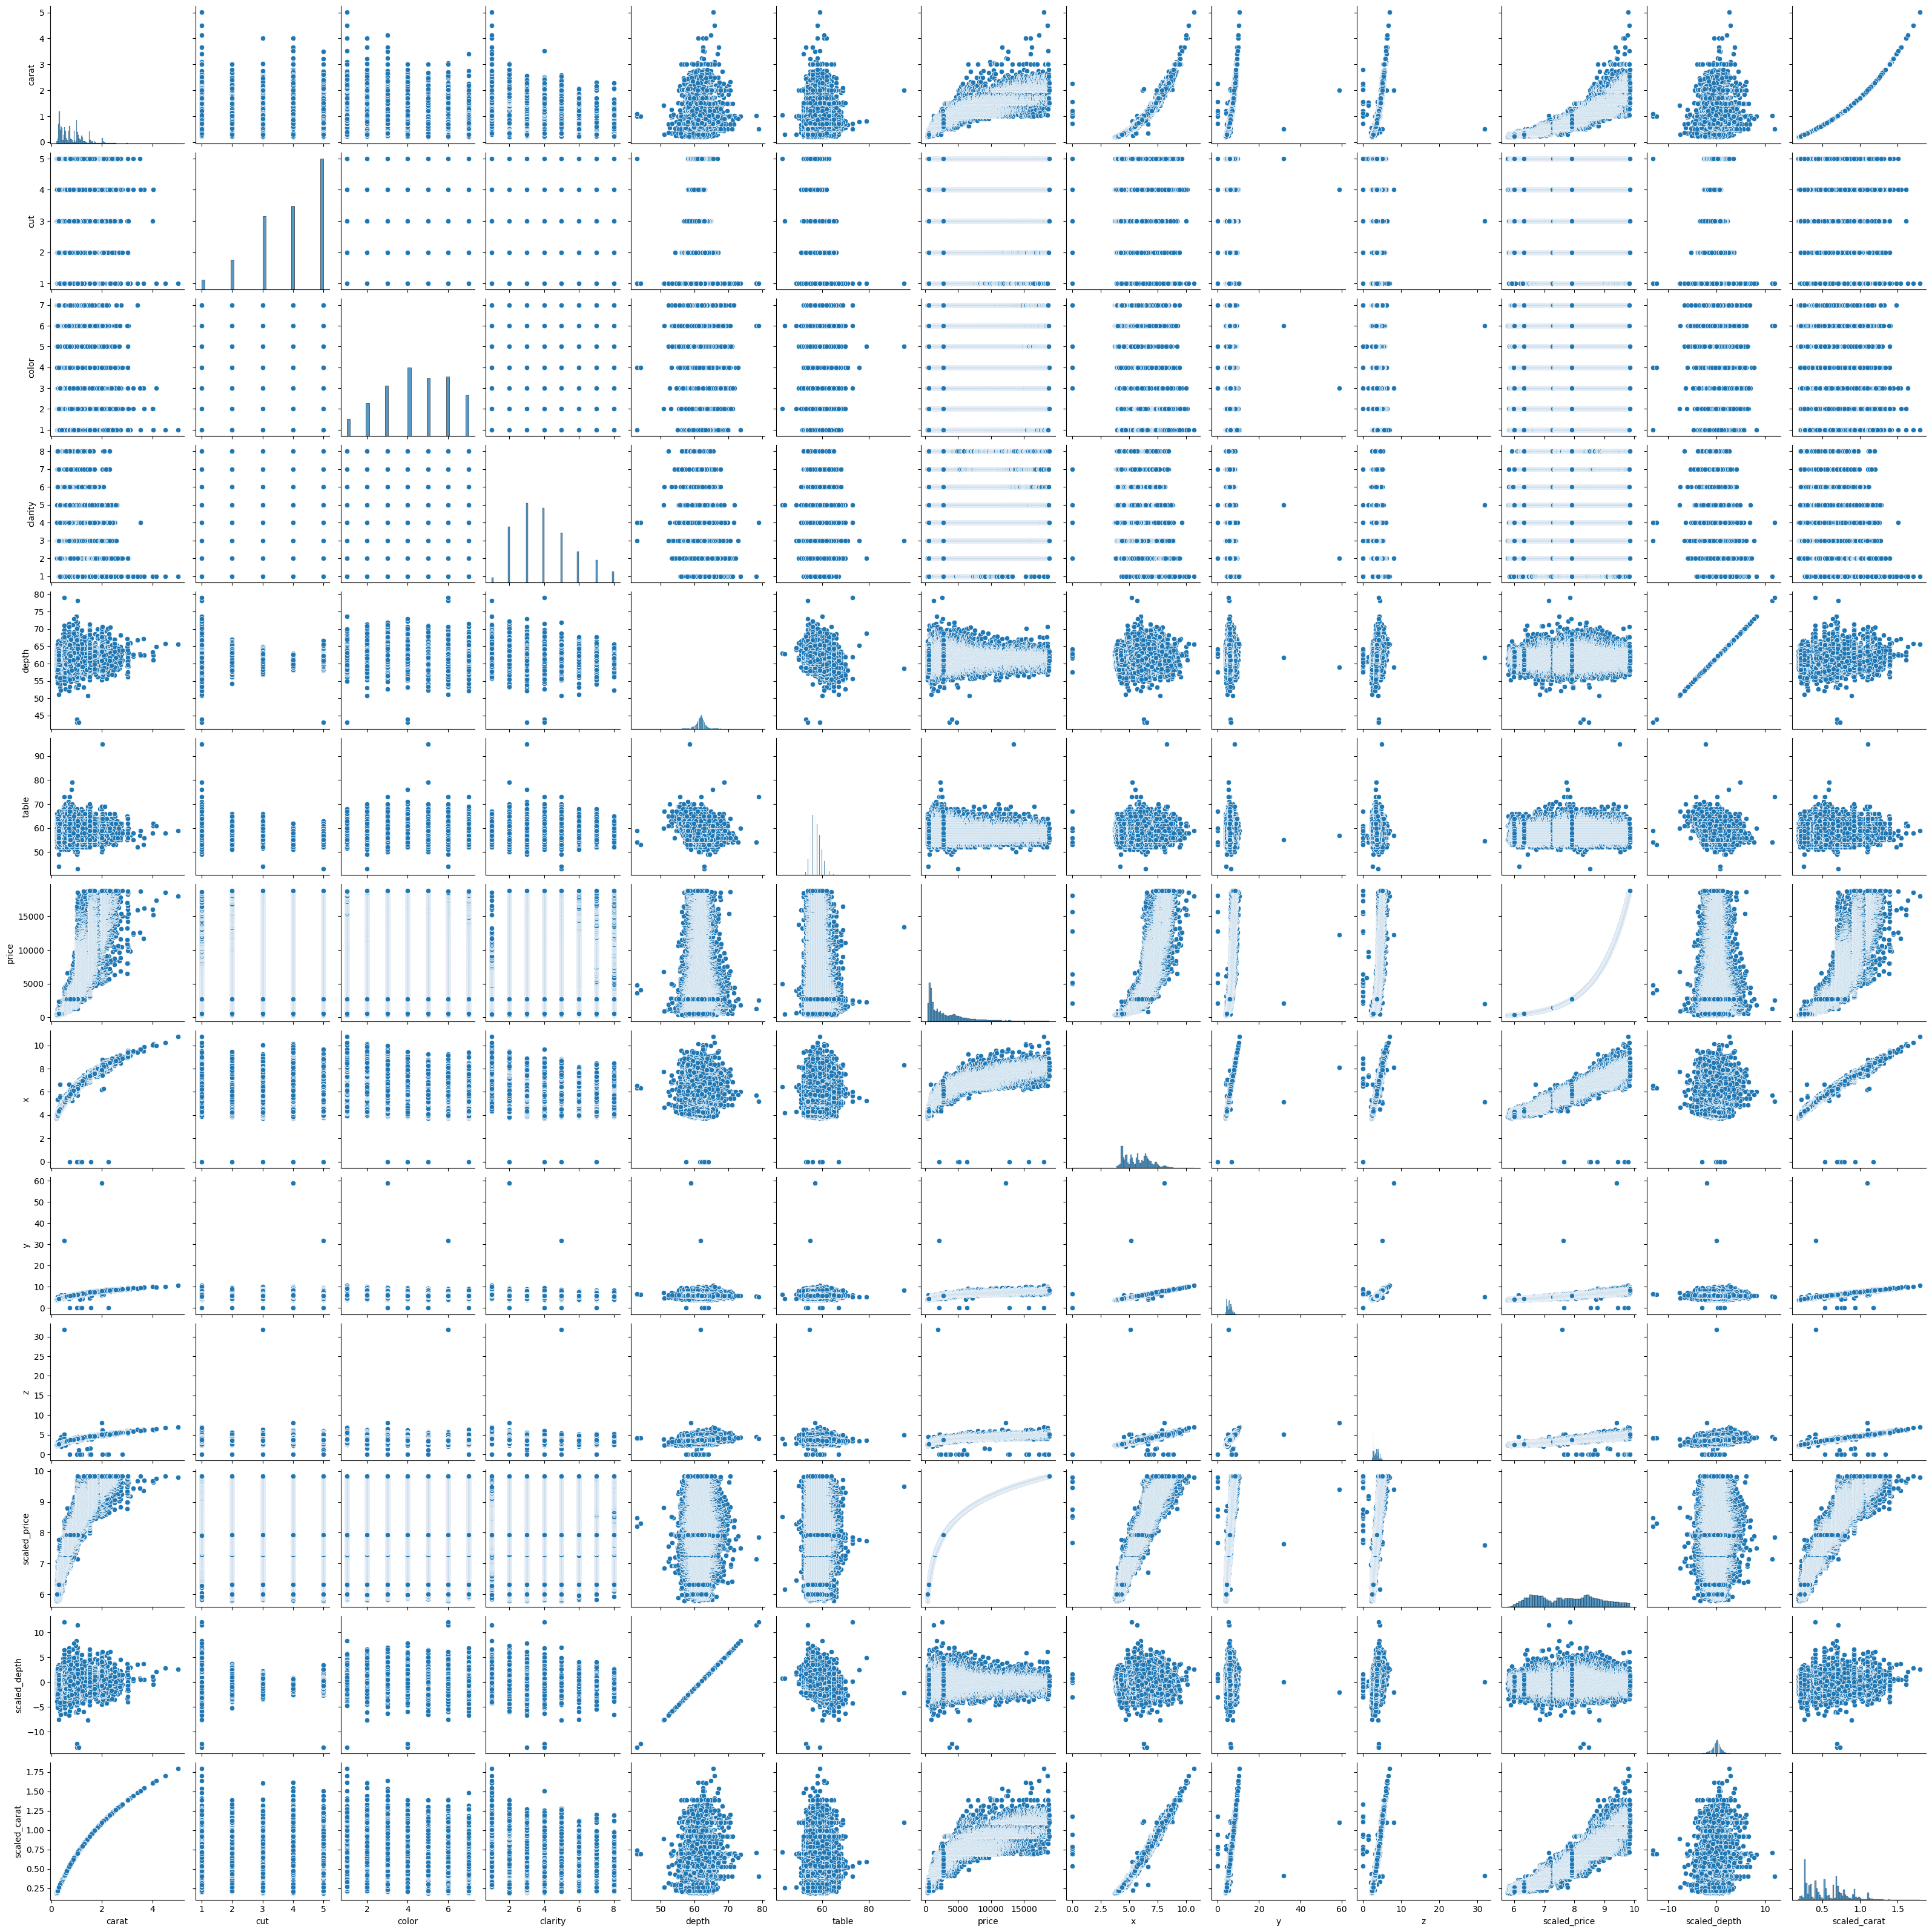

In [35]:
sns.pairplot(updated_df)

# Scaling

# Importance
Features with larger values than others have the model focus on them more even when the smaller values have more importance
Also makes the model train faster when scaled because it makes the problem easier for the model to solve

-Standard scaling is for normaly distributed data

-Robust scaling is for data with many outliers

-log scaling is for skewed data

# Visualization after Scaling

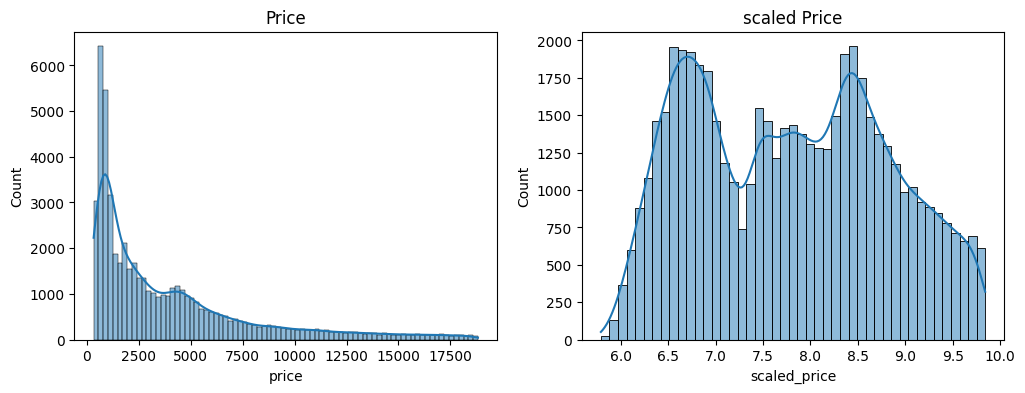

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(updated_df['price'], kde=True)
plt.title('Price')
plt.subplot(1, 2, 2)
sns.histplot(updated_df['scaled_price'], kde=True)
plt.title('scaled Price')
plt.show()

the price distribution became nearly normal

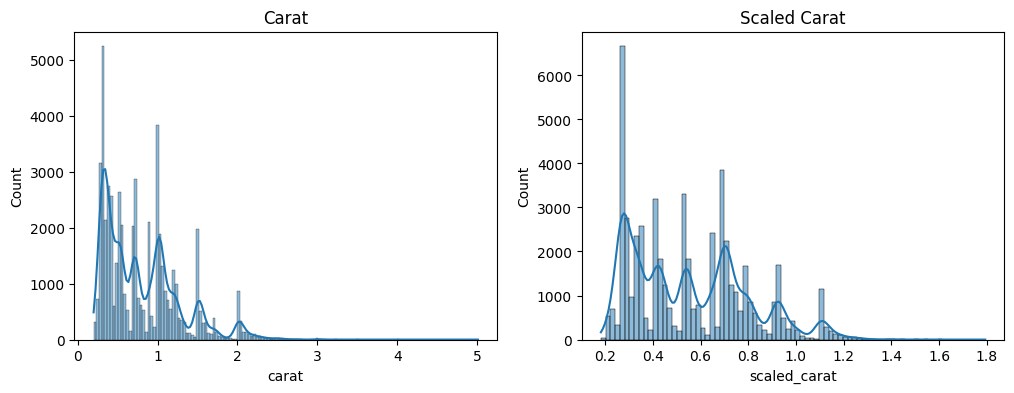

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(updated_df['carat'], kde=True)
plt.title('Carat')
plt.subplot(1, 2, 2)
sns.histplot(updated_df['scaled_carat'], kde=True)
plt.title('Scaled Carat')
plt.show()

the outliers became compressed and the distribution became closer to normal

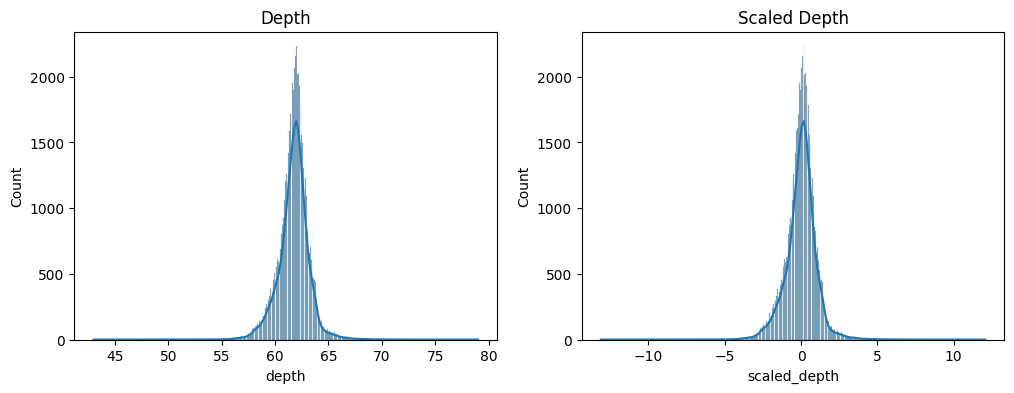

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(updated_df['depth'], kde=True)
plt.title('Depth')
plt.subplot(1, 2, 2)
sns.histplot(updated_df['scaled_depth'], kde=True)
plt.title('Scaled Depth')
plt.show()

the mean became 0 instead of 61.75

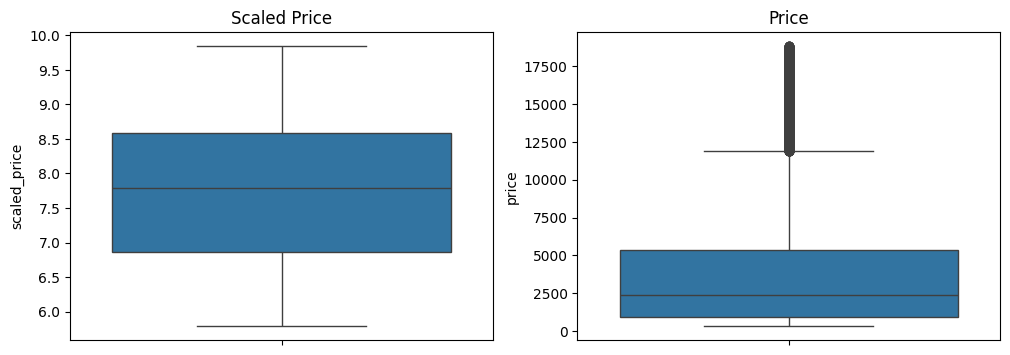

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(updated_df['scaled_price'])
plt.title("Scaled Price")
plt.subplot(1, 2, 2)
sns.boxplot(updated_df['price'])
plt.title('Price')
plt.show()

the outliers are gone and the median moved to the center

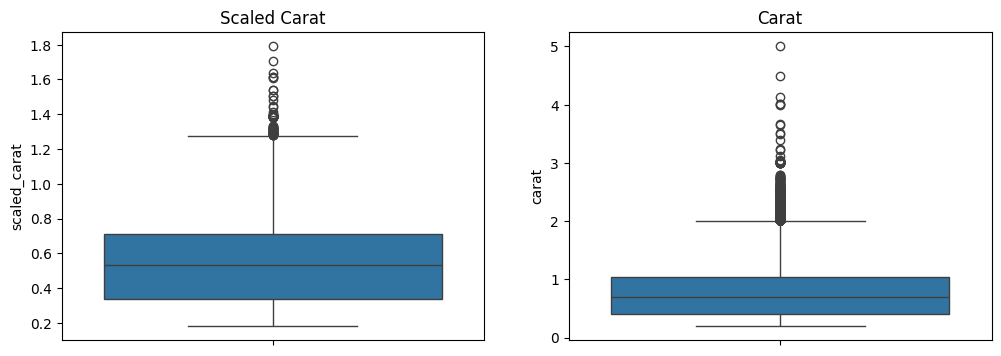

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(updated_df['scaled_carat'])
plt.title("Scaled Carat")
plt.subplot(1, 2, 2)
sns.boxplot(updated_df['carat'])
plt.title('Carat')
plt.show()

less outliers but not many differences

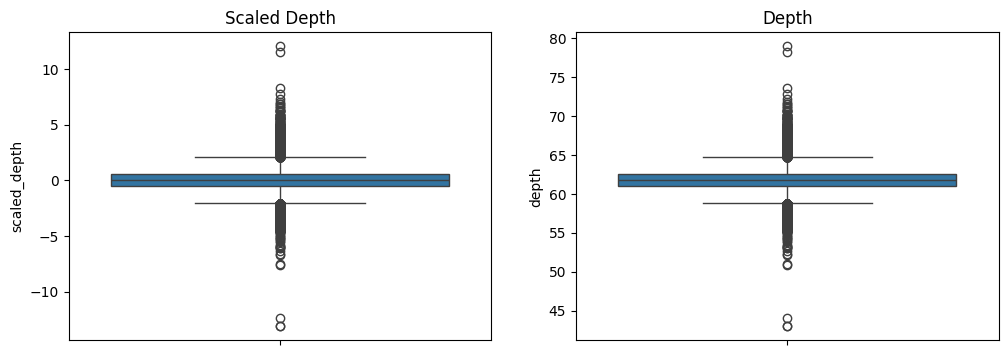

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(updated_df['scaled_depth'])
plt.title("Scaled Depth")
plt.subplot(1, 2, 2)
sns.boxplot(updated_df['depth'])
plt.title('Depth')
plt.show()

only the median is changed to 0